## Problem statement
* [Introduction](#Introduction)
* [1. EDA & Data Transformation](#1.-EDA-&-Data-Transformation)
  * [1.1 Checking Missing](#1.1.-Checking-missing-values)
* [2. Feature Engineering](#2.-Feature-Engineering)
  * [2.1 Handling Missing Data](#2.1-Handling-Missing-Data)
  * [2.2 Dealing with Locational Data](#2.2-Dealing-with-Locational-Data)
    * [2.2.1 Kmeans for an Try to Rescue](#2.2.1-Kmeans-for-an-Try-to-Rescue)
  * [2.3 Date_Time conversion](#2.3-Date-Time-conversion)
  * [2.4 Dropping unwanted ](#2.4-Dropping-unwanted )
  * [2.5 Encoding](#2.5-Encoding)
  * [2.6 Text Preprocessing](#2.6-Text-Preprocessing)
  * [2.7 Tfidf Text features](#2.7-Tfidf-Text-features)
  * [2.8 Data Split](#2.8-Data-Split)
* [3 Text Features and categorical Features in Catboost](#3-Text-Features-and-categorical-Features-in-Catboost)

<!-- ## 2.4 Dropping unwanted  -->

# Introduction

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack, csr_matrix,coo_matrix
import scipy

In [42]:
import nltk
import string
import spacy
en_core = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize.regexp import regexp_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()



In [43]:
train_df=pd.read_csv('./dataset/train_file.csv')
test_df=pd.read_csv('./dataset/test_file.csv')

In [44]:
train_df

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33534,6093924,Construction,3516 S JUNEAU ST,Interior repairs and modifications to existing...,NaN,Plan Review,"SINGER, BILL",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.550138,-122.288036,"{'latitude': '47.55013793', 'human_address': '...",SINGLE FAMILY / DUPLEX
33535,6420980,Construction,1106 M L KING JR WAY S,Construct south duplex (units C&D) with one su...,ADD/ALT,Plan Review,"ZHANG, MOON",2014-06-04T00:00:00,2014-09-10T00:00:00,2015-09-01T00:00:00,2016-03-10T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3017193.0,47.592970,-122.297593,"{'latitude': '47.59297026', 'human_address': '...",SINGLE FAMILY / DUPLEX
33536,6429706,Construction,5806 57TH AVE NE,Establish use as and construction of single fa...,NEW,Plan Review,"GAGNON, DON & KARIN",2014-10-08T00:00:00,2014-12-05T00:00:00,2015-09-09T00:00:00,2016-06-05T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.670508,-122.266558,"{'latitude': '47.67050776', 'human_address': '...",SINGLE FAMILY / DUPLEX
33537,6654781,Construction,4216 S KENNY ST,Construction new 1923 s.f. single story wood f...,NEW,Plan Review,"PASTOR, DONALD",NaN,NaN,NaN,NaN,NaN,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.549138,-122.279919,"{'latitude': '47.54913813', 'human_address': '...",SINGLE FAMILY / DUPLEX


## 2. Feature Engineering

## 2.1 Handling Missing Data

In [45]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [46]:
numerical_cols = ['Master Use Permit']
date_cols=['Application Date','Issue Date','Final Date','Expiration Date']
text_cols=['Contractor','Action Type','Applicant Name','Location','Address','Status','Description']

# train_df=train_df.update(train_df[numerical_cols].fillna(-999))
# print(train_df)
train_df.update(train_df[text_cols].fillna(''))
print(train_df.isna().sum())
print('\n'+'Testing Data Null values\n')
test_df.update(test_df[numerical_cols].fillna(-999))
test_df.update(test_df[text_cols].fillna(''))
# print(test_df.isna().sum())

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                  29041
Latitude                              21
Longitude                             21
Location                               0
Category                               0
dtype: int64

Testing Data Null values



## 2.2 Dealing with Locational Data

## 2.2.1 Kmeans for an Try to Rescue 

In [47]:

train_Location=train_df[['Latitude','Longitude']].dropna()
test_Location=test_df[['Latitude','Longitude']].dropna()

from sklearn.cluster import KMeans
clusters=10
kmeans=KMeans(n_clusters=clusters,random_state=0).fit(train_Location[['Latitude','Longitude']].values)


Text(0.5, 0, 'Latitude')

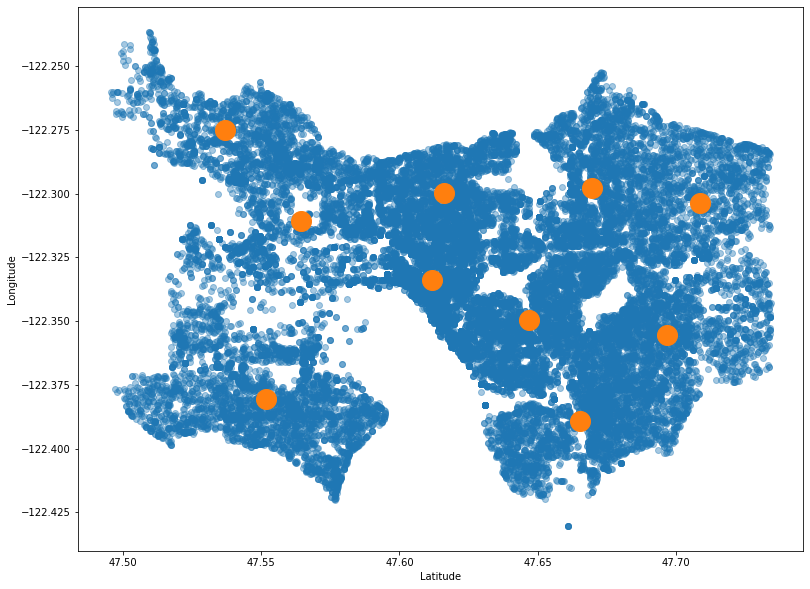

In [48]:
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(train_Location.Latitude,train_Location.Longitude,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')

Text(0.5, 0, 'Latitude')

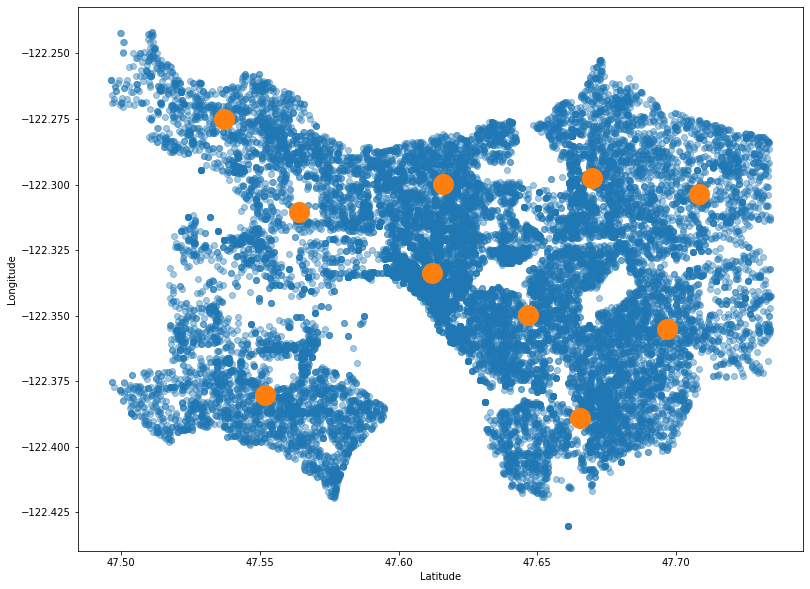

In [49]:
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(test_Location.Latitude,test_Location.Longitude,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')

In [50]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(train_Location[['Latitude','Longitude']].values),columns=['gspatial_' + str(i) for i in range(clusters)])
kmean_feats_test=pd.DataFrame(kmeans.fit_transform(test_Location[['Latitude','Longitude']].values),columns=['gspatial_' + str(i) for i in range(clusters)])

In [51]:
kmean_feats

,gspatial_0,gspatial_1,gspatial_2,gspatial_3,gspatial_4,gspatial_5,gspatial_6,gspatial_7,gspatial_8,gspatial_9
0,0.031428,0.069718,0.073003,0.104184,0.039742,0.028434,0.074848,0.028772,0.109271,0.073385
1,0.128460,0.178480,0.064383,0.041850,0.162099,0.096115,0.150752,0.112477,0.082782,0.196968
2,0.025630,0.074873,0.065536,0.083828,0.060671,0.012756,0.065952,0.038547,0.107131,0.090828
3,0.055761,0.105209,0.035583,0.067413,0.080815,0.017625,0.092715,0.035537,0.078905,0.115992
4,0.066032,0.036234,0.141688,0.165109,0.042454,0.094770,0.079851,0.091932,0.174532,0.016537
...,...,...,...,...,...,...,...,...,...,...
33513,0.114485,0.161313,0.026597,0.092389,0.119938,0.076769,0.153156,0.066932,0.018475,0.158995
33514,0.074763,0.118748,0.031434,0.092407,0.076721,0.040718,0.116567,0.023159,0.060282,0.115546
33515,0.086466,0.092507,0.114930,0.164355,0.031075,0.089096,0.122567,0.063861,0.133663,0.053102
33516,0.119863,0.165751,0.034174,0.100528,0.121847,0.082609,0.159352,0.069789,0.013021,0.160993


In [52]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(train_Location[['Latitude','Longitude']].values),index=np.unique(np.where(train_df[['Longitude','Latitude']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
train_df=pd.concat([train_df,kmean_feats],axis=1)
train_df.isna().sum()

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                  29041
Latitude                              21
Longitude                             21
Location                               0
Category                               0
gspatial_0                            21
gspatial_1                            21
gspatial_2                            21
gspatial_3                            21
gspatial_4                            21
gspatial_5      

In [54]:
kmean_feats_test=pd.DataFrame(kmeans.fit_transform(test_Location[['Latitude','Longitude']].values),index=np.unique(np.where(test_df[['Longitude','Latitude']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
test_df=pd.concat([test_df,kmean_feats_test],axis=1)
test_df.isna().sum()

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    4497
Issue Date                          6941
Final Date                         11961
Expiration Date                     6915
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              16
Longitude                             16
Location                               0
gspatial_0                            16
gspatial_1                            16
gspatial_2                            16
gspatial_3                            16
gspatial_4                            16
gspatial_5                            16
gspatial_6      

## folium to visualize

In [55]:
train_Location=train_df[['Latitude','Longitude']].dropna()
test_Location=test_df[['Latitude','Longitude']].dropna()

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; width:75em}</style>"))

In [56]:
import folium

m=folium.Map(location=[train_Location['Latitude'].mean(),train_Location['Longitude'].mean()],zoom_start=5,tiles='Stamen toner')

for _,row in (train_Location[:100].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='orange',
    fill=True,
    fill_color='orange').add_to(m)
m

In [16]:
# for _,row in (train_Location[101:300].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

In [17]:

# for _,row in (train_Location[ 400:700].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

In [18]:

# for _,row in (train_Location[ 700:1100].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

## DBScan and Optic Clustering to make it Better

In [19]:
# from sklearn.cluster import DBSCAN
# kms_per_radian = 63.0088
# epsilon = 5 / kms_per_radian
# db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine',n_job).fit(np.radians(train_Location[:10]))
# cluster_labels = db.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([train_Location{:10}[cluster_labels == n] for n in range(num_clusters)])
# print('Number of clusters: {}'.format(num_clusters))


## 2.3 Date Time conversion

In [57]:
print("\nCreate Day Variables")

train_df['Application Date'] = pd.to_datetime(train_df['Application Date'], format='%Y-%m-%d')
train_df['Issue Date'] = pd.to_datetime(train_df['Issue Date'], format='%Y-%m-%d')
train_df['Final Date'] = pd.to_datetime(train_df['Final Date'], format='%Y-%m-%d')
train_df['Expiration Date'] = pd.to_datetime(train_df['Expiration Date'], format='%Y-%m-%d')
    
    
train_df['App_day'] = train_df['Application Date'].dt.day
train_df['Issue_Day'] = train_df['Issue Date'].dt.day
train_df['Final_Day'] = train_df['Final Date'].dt.day
train_df['Exp_Day']   = train_df['Expiration Date'].dt.day

train_df['App_week'] = train_df['Application Date'].dt.week
train_df['Issue_week'] = train_df['Issue Date'].dt.week
train_df['Final_week'] = train_df['Final Date'].dt.week
train_df['Exp_week']   = train_df['Expiration Date'].dt.week
train_df.isna().sum()   


Create Day Variables


<ipython-input-57-c8ade5253844>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['App_week'] = train_df['Application Date'].dt.week
<ipython-input-57-c8ade5253844>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Issue_week'] = train_df['Issue Date'].dt.week
<ipython-input-57-c8ade5253844>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Final_week'] = train_df['Final Date'].dt.week
<ipython-input-57-c8ade5253844>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Exp_week']   = train_df['Expiration Date'].dt.week


Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                  29041
Latitude                              21
Longitude                             21
Location                               0
Category                               0
gspatial_0                            21
gspatial_1                            21
gspatial_2                            21
gspatial_3                            21
gspatial_4                            21
gspatial_5      

In [58]:
train_df[date_cols]

,Application Date,Issue Date,Final Date,Expiration Date
0,2018-01-16,2018-01-16,NaT,2019-07-16
1,2015-02-13,2015-04-16,2016-11-15,2016-10-16
2,2014-09-04,2014-09-04,2015-11-20,2016-03-04
3,NaT,NaT,NaT,NaT
4,2013-05-02,2013-12-19,2015-05-14,2015-06-19
...,...,...,...,...
33534,NaT,NaT,NaT,NaT
33535,2014-06-04,2014-09-10,2015-09-01,2016-03-10
33536,2014-10-08,2014-12-05,2015-09-09,2016-06-05
33537,NaT,NaT,NaT,NaT


In [59]:

test_df['Application Date'] = pd.to_datetime(test_df['Application Date'], format='%Y-%m-%d')
test_df['Issue Date'] = pd.to_datetime(test_df['Issue Date'], format='%Y-%m-%d')
test_df['Final Date'] = pd.to_datetime(test_df['Final Date'], format='%Y-%m-%d')
test_df['Expiration Date'] = pd.to_datetime(test_df['Expiration Date'], format='%Y-%m-%d')

test_df['App_day'] = test_df['Application Date'].dt.day
test_df['Issue_Day'] = test_df['Issue Date'].dt.day
test_df['Final_Day'] = test_df['Final Date'].dt.day
test_df['Exp_Day'] = test_df['Expiration Date'].dt.day

test_df['App_week'] = test_df['Application Date'].dt.week
test_df['Issue_week'] = test_df['Issue Date'].dt.week
test_df['Final_week'] = test_df['Final Date'].dt.week
test_df['Exp_week'] = test_df['Expiration Date'].dt.week
test_df.isna().sum()   

<ipython-input-59-fa482ddcd1ab>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['App_week'] = test_df['Application Date'].dt.week
<ipython-input-59-fa482ddcd1ab>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Issue_week'] = test_df['Issue Date'].dt.week
<ipython-input-59-fa482ddcd1ab>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Final_week'] = test_df['Final Date'].dt.week
<ipython-input-59-fa482ddcd1ab>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Exp_week'] = test_df['Expiration Date'].dt.week


Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    4497
Issue Date                          6941
Final Date                         11961
Expiration Date                     6915
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              16
Longitude                             16
Location                               0
gspatial_0                            16
gspatial_1                            16
gspatial_2                            16
gspatial_3                            16
gspatial_4                            16
gspatial_5                            16
gspatial_6      

## 2.4 Dropping unwanted 

In [60]:
date_cols

['Application Date', 'Issue Date', 'Final Date', 'Expiration Date']

In [61]:
train_df=train_df.drop(columns=['Permit and Complaint Status URL'])
# train_df=train_df.drop(columns=['Applicant Name'])
train_df=train_df.drop(columns=date_cols)

train_df=train_df.drop(columns=['Latitude','Longitude','Address','Location'])
train_df.isna().sum()

test_df=test_df.drop(columns=['Permit and Complaint Status URL'])
# test_df=test_df.drop(columns=['Applicant Name'])

test_df=test_df.drop(columns=date_cols)
test_df=test_df.drop(columns=['Latitude','Longitude','Address','Location'])
test_df.isna().sum()

Application/Permit Number        0
Permit Type                      0
Description                      0
Action Type                      0
Work Type                        0
Applicant Name                   0
Status                           0
Contractor                       0
Master Use Permit                0
gspatial_0                      16
gspatial_1                      16
gspatial_2                      16
gspatial_3                      16
gspatial_4                      16
gspatial_5                      16
gspatial_6                      16
gspatial_7                      16
gspatial_8                      16
gspatial_9                      16
gspatial_0                      16
gspatial_1                      16
gspatial_2                      16
gspatial_3                      16
gspatial_4                      16
gspatial_5                      16
gspatial_6                      16
gspatial_7                      16
gspatial_8                      16
gspatial_9          

In [62]:
for i in range(0,clusters):
    train_df['gspatial_'+ str(i)]=train_df['gspatial_'+ str(i)].fillna(-999)
day_week_cols=['App_day','Issue_Day','Final_Day','Exp_Day','App_week','Issue_week','Final_week','Exp_week']
for col in day_week_cols:
    train_df[col]=train_df[col].fillna(-999)

train_df.isna().sum()      

for i in range(0,clusters):
    test_df['gspatial_'+ str(i)]=test_df['gspatial_'+ str(i)].fillna(-999)
day_week_cols=['App_day','Issue_Day','Final_Day','Exp_Day','App_week','Issue_week','Final_week','Exp_week']
for col in day_week_cols:
    test_df[col]=test_df[col].fillna(-999)

test_df.isna().sum()   

Application/Permit Number    0
Permit Type                  0
Description                  0
Action Type                  0
Work Type                    0
Applicant Name               0
Status                       0
Contractor                   0
Master Use Permit            0
gspatial_0                   0
gspatial_1                   0
gspatial_2                   0
gspatial_3                   0
gspatial_4                   0
gspatial_5                   0
gspatial_6                   0
gspatial_7                   0
gspatial_8                   0
gspatial_9                   0
gspatial_0                   0
gspatial_1                   0
gspatial_2                   0
gspatial_3                   0
gspatial_4                   0
gspatial_5                   0
gspatial_6                   0
gspatial_7                   0
gspatial_8                   0
gspatial_9                   0
App_day                      0
Issue_Day                    0
Final_Day                    0
Exp_Day 

## 2.5 Encoding

In [63]:
num_col=[]
obj_col=[]

num_col = numerical_cols+['gspatial_'+ str(i) for i in range(0,clusters)]+day_week_cols
obj_col=[col for col in train_df if col not in num_col]

obj_col.remove('Description')
obj_col.remove('Category')

# obj_col.remove('Applicant Name')
# obj_col.remove('Status')


In [27]:
# train_df=pd.concat([train_df,categorical_features],axis=1)

## 2.6 Text Preprocessing

In [64]:
#### train
train_df['Description'] = train_df['Description'].fillna('')
train_df['clean_description']=[' '.join([w for w in x.lower().split() if w not in stop]) for x in train_df['Description'].tolist()]
##### test
test_df['Description'] = test_df['Description'].fillna('')
test_df['clean_description']=[' '.join([w for w in x.lower().split() if w not in stop]) for x in test_df['Description'].tolist()]

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '',string.punctuation))

def lemmatize(text):
    tokens=regexp_tokenize(text,pattern='\s+',gaps=True) #https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5
    return ' '.join([lemmatizer.lemmatize(w) for w in tokens])
###### Train
train_df['clean_description']=train_df['clean_description'].apply(lemmatize)
train_df['clean_description']=train_df['clean_description'].apply(remove_punctuation)
# print(train_df['clean_description'])

#### Test
test_df['clean_description']=test_df['clean_description'].apply(lemmatize)
test_df['clean_description']=test_df['clean_description'].apply(remove_punctuation)
# print(train_df['clean_description'])

train_df=train_df.drop('Description',axis=1)
test_df=test_df.drop('Description',axis=1)    

## 2.7 Tfidf Text features

In [65]:
# pip install texthero
# import texthero as hero

# df['tfidf'] = hero.tfidf(df['sent'])

In [66]:
########## singular column
text_cols=['clean_description']
text_cols
from sklearn.feature_extraction.text import TfidfVectorizer
def text_features_uni(df):
    for cols in text_cols:
        
        df[cols] = df[cols].astype(str) 
        df[cols] = df[cols].astype(str).fillna('') # FILL NA
        
        df[cols] = df[cols].str.lower() # Lowercase all text, so that capitalized words dont get treated differently
        df[cols] = df[cols].astype(str).fillna('missing') # FILL NA
        
        df[cols +'_nos_removed']=df[cols].str.replace('\d+', '')
        

        df[cols + '_num_words'] = df[cols].apply(lambda comment: len(comment.split())) # Count number of Words
        df[cols + '_num_unique_words'] = df[cols].apply(lambda comment: len(set(w for w in comment.split())))
        df[cols + '_words_vs_unique'] = df[cols+'_num_unique_words'] / df[cols+'_num_words'] * 100 # Count Unique Words
    return df
    

    print("\n[TF-IDF] Term Frequency Inverse Document Frequency Stage")

train_df=text_features_uni(train_df)
test_df=text_features_uni(test_df)

train_df=train_df.drop('clean_description',axis=1)
test_df=test_df.drop('clean_description',axis=1)


<ipython-input-66-100c72c610da>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df[cols +'_nos_removed']=df[cols].str.replace('\d+', '')


In [67]:
train_df.columns

Index(['Application/Permit Number', 'Permit Type', 'Action Type', 'Work Type',
       'Applicant Name', 'Status', 'Contractor', 'Master Use Permit',
       'Category', 'gspatial_0', 'gspatial_1', 'gspatial_2', 'gspatial_3',
       'gspatial_4', 'gspatial_5', 'gspatial_6', 'gspatial_7', 'gspatial_8',
       'gspatial_9', 'App_day', 'Issue_Day', 'Final_Day', 'Exp_Day',
       'App_week', 'Issue_week', 'Final_week', 'Exp_week',
       'clean_description_nos_removed', 'clean_description_num_words',
       'clean_description_num_unique_words',
       'clean_description_words_vs_unique'],
      dtype='object')

In [68]:
# train_df['Application/Permit Number']=le.fit_transform(train_df['Application/Permit Number'])
# obj_col.remove('Application/Permit Number')
# test_df['Application/Permit Number']=le.fit_transform(test_df['Application/Permit Number'])
train_df['clean_description_words_vs_unique']=train_df['clean_description_words_vs_unique'].fillna(0)
test_df['clean_description_words_vs_unique']=test_df['clean_description_words_vs_unique'].fillna(0)
# print(test_df.isna().sum())
# print(train_df.isna().sum())

In [69]:
print(len(train_df.columns))
print(len(test_df.columns))
print(obj_col)

31
40
['Application/Permit Number', 'Permit Type', 'Action Type', 'Work Type', 'Applicant Name', 'Status', 'Contractor']


## 2.8 Data Split

In [70]:
from sklearn.model_selection import train_test_split
y=train_df['Category']
X=train_df.drop('Category',axis=1)
y=le.fit_transform(y)

In [71]:
X.isna().sum()

Application/Permit Number                 0
Permit Type                               0
Action Type                               0
Work Type                                 0
Applicant Name                            0
Status                                    0
Contractor                                0
Master Use Permit                     29041
gspatial_0                                0
gspatial_1                                0
gspatial_2                                0
gspatial_3                                0
gspatial_4                                0
gspatial_5                                0
gspatial_6                                0
gspatial_7                                0
gspatial_8                                0
gspatial_9                                0
App_day                                   0
Issue_Day                                 0
Final_Day                                 0
Exp_Day                                   0
App_week                        

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [73]:
# import lightgbm
# import time
import catboost
from catboost import CatBoostClassifier,Pool
from catboost.utils import get_gpu_device_count
print('\n%i GPU devices available' % get_gpu_device_count())



1 GPU devices available


# 3 Text Features and categorical Features in Catboost

issue while CPU and AUC
CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/train_lib/train_model.cpp:689: Feature calcers are not supported in CPU training yet

issue while GPU and AUC

warning AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time

issue: CatBoostError: c:/program files (x86)/go 
agent/pipelines/buildmaster/catboost.git/catboost/cuda/targets/gpu_metrics.cpp:662: Eval metric should have a single value. Metric MultiClass provides a value for each class, thus it cannot be used as a single value to select best iteration or to detect overfitting. If you just want to look on the values of this metric use custom_metric parameter.


In [74]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.02,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")

train_pool=Pool(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
test_pool=Pool(X_test,y_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])
catboost_model.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8692454	test: 0.8599881	best: 0.8599881 (0)	total: 372ms	remaining: 9m 17s
1:	learn: 0.8697623	test: 0.8685748	best: 0.8685748 (1)	total: 490ms	remaining: 6m 7s
2:	learn: 0.8706766	test: 0.8707215	best: 0.8707215 (2)	total: 609ms	remaining: 5m 4s
3:	learn: 0.8709549	test: 0.8708408	best: 0.8708408 (3)	total: 733ms	remaining: 4m 34s
4:	learn: 0.8700803	test: 0.8709600	best: 0.8709600 (4)	total: 844ms	remaining: 4m 12s
5:	learn: 0.8703188	test: 0.8719141	best: 0.8719141 (5)	total: 964ms	remaining: 4m
6:	learn: 0.8704381	test: 0.8711986	best: 0.8719141 (5)	total: 1.08s	remaining: 3m 49s
7:	learn: 0.8713525	test: 0.8722719	best: 0.8722719 (7)	total: 1.21s	remaining: 3m 45s
8:	learn: 0.8705176	test: 0.8711986	best: 0.8722719 (7)	total: 1.35s	remaining: 3m 43s
9:	learn: 0.8702791	test: 0.8703637	best: 0.8722719 (7)	total: 1.49s	remaining: 3m 41s
10:	learn: 0.8703188	test: 0.8708408	best: 0.8722719 (7)	total: 1.6s	remaining: 3m 36s
11:	learn: 0.8707164	test: 0.8708408	best: 0.8722

93:	learn: 0.8845114	test: 0.8808587	best: 0.8808587 (93)	total: 18.4s	remaining: 4m 35s
94:	learn: 0.8844319	test: 0.8806202	best: 0.8808587 (93)	total: 18.5s	remaining: 4m 33s
95:	learn: 0.8844717	test: 0.8805009	best: 0.8808587 (93)	total: 18.6s	remaining: 4m 31s
96:	learn: 0.8848295	test: 0.8806202	best: 0.8808587 (93)	total: 18.7s	remaining: 4m 30s
97:	learn: 0.8849090	test: 0.8808587	best: 0.8808587 (93)	total: 19s	remaining: 4m 31s
98:	learn: 0.8853463	test: 0.8810972	best: 0.8810972 (98)	total: 19.4s	remaining: 4m 34s
99:	learn: 0.8850282	test: 0.8812165	best: 0.8812165 (99)	total: 19.7s	remaining: 4m 35s
100:	learn: 0.8851077	test: 0.8810972	best: 0.8812165 (99)	total: 20.1s	remaining: 4m 38s
101:	learn: 0.8854655	test: 0.8816935	best: 0.8816935 (101)	total: 20.6s	remaining: 4m 41s
102:	learn: 0.8855450	test: 0.8816935	best: 0.8816935 (101)	total: 21s	remaining: 4m 44s
103:	learn: 0.8857438	test: 0.8816935	best: 0.8816935 (101)	total: 21.4s	remaining: 4m 46s
104:	learn: 0.8857

184:	learn: 0.8929792	test: 0.8858676	best: 0.8858676 (184)	total: 35.5s	remaining: 4m 12s
185:	learn: 0.8929792	test: 0.8859869	best: 0.8859869 (185)	total: 35.9s	remaining: 4m 13s
186:	learn: 0.8930190	test: 0.8861061	best: 0.8861061 (186)	total: 36.3s	remaining: 4m 14s
187:	learn: 0.8930985	test: 0.8861061	best: 0.8861061 (186)	total: 36.7s	remaining: 4m 15s
188:	learn: 0.8931780	test: 0.8859869	best: 0.8861061 (186)	total: 37.1s	remaining: 4m 17s
189:	learn: 0.8932575	test: 0.8859869	best: 0.8861061 (186)	total: 37.4s	remaining: 4m 18s
190:	learn: 0.8935358	test: 0.8863447	best: 0.8863447 (190)	total: 37.9s	remaining: 4m 19s
191:	learn: 0.8936551	test: 0.8862254	best: 0.8863447 (190)	total: 38.2s	remaining: 4m 20s
192:	learn: 0.8935358	test: 0.8862254	best: 0.8863447 (190)	total: 38.6s	remaining: 4m 21s
193:	learn: 0.8935358	test: 0.8862254	best: 0.8863447 (190)	total: 39s	remaining: 4m 22s
194:	learn: 0.8936551	test: 0.8863447	best: 0.8863447 (190)	total: 39.4s	remaining: 4m 23s
1

275:	learn: 0.8989028	test: 0.8876565	best: 0.8880143 (238)	total: 53s	remaining: 3m 55s
276:	learn: 0.8989425	test: 0.8877758	best: 0.8880143 (238)	total: 53.5s	remaining: 3m 56s
277:	learn: 0.8988630	test: 0.8878951	best: 0.8880143 (238)	total: 54.1s	remaining: 3m 57s
278:	learn: 0.8990618	test: 0.8878951	best: 0.8880143 (238)	total: 54.5s	remaining: 3m 58s
279:	learn: 0.8991413	test: 0.8877758	best: 0.8880143 (238)	total: 54.6s	remaining: 3m 57s
280:	learn: 0.8991015	test: 0.8880143	best: 0.8880143 (238)	total: 54.7s	remaining: 3m 57s
281:	learn: 0.8991810	test: 0.8880143	best: 0.8880143 (238)	total: 54.7s	remaining: 3m 56s
282:	learn: 0.8993003	test: 0.8880143	best: 0.8880143 (238)	total: 54.8s	remaining: 3m 55s
283:	learn: 0.8993401	test: 0.8880143	best: 0.8880143 (238)	total: 54.9s	remaining: 3m 55s
284:	learn: 0.8993401	test: 0.8881336	best: 0.8881336 (284)	total: 55s	remaining: 3m 54s
285:	learn: 0.8993798	test: 0.8881336	best: 0.8881336 (284)	total: 55.1s	remaining: 3m 53s
286

366:	learn: 0.9033156	test: 0.8878951	best: 0.8881336 (284)	total: 1m 5s	remaining: 3m 22s
367:	learn: 0.9033951	test: 0.8877758	best: 0.8881336 (284)	total: 1m 6s	remaining: 3m 23s
368:	learn: 0.9034746	test: 0.8877758	best: 0.8881336 (284)	total: 1m 6s	remaining: 3m 23s
369:	learn: 0.9035939	test: 0.8878951	best: 0.8881336 (284)	total: 1m 6s	remaining: 3m 24s
370:	learn: 0.9035939	test: 0.8877758	best: 0.8881336 (284)	total: 1m 7s	remaining: 3m 24s
371:	learn: 0.9035939	test: 0.8877758	best: 0.8881336 (284)	total: 1m 7s	remaining: 3m 24s
372:	learn: 0.9036336	test: 0.8877758	best: 0.8881336 (284)	total: 1m 7s	remaining: 3m 25s
373:	learn: 0.9036336	test: 0.8876565	best: 0.8881336 (284)	total: 1m 8s	remaining: 3m 25s
374:	learn: 0.9036734	test: 0.8878951	best: 0.8881336 (284)	total: 1m 8s	remaining: 3m 26s
375:	learn: 0.9037131	test: 0.8881336	best: 0.8881336 (284)	total: 1m 9s	remaining: 3m 26s
376:	learn: 0.9037131	test: 0.8881336	best: 0.8881336 (284)	total: 1m 9s	remaining: 3m 27s

456:	learn: 0.9068140	test: 0.8901610	best: 0.8901610 (444)	total: 1m 20s	remaining: 3m 3s
457:	learn: 0.9068538	test: 0.8901610	best: 0.8901610 (444)	total: 1m 20s	remaining: 3m 3s
458:	learn: 0.9068538	test: 0.8901610	best: 0.8901610 (444)	total: 1m 20s	remaining: 3m 3s
459:	learn: 0.9069333	test: 0.8901610	best: 0.8901610 (444)	total: 1m 21s	remaining: 3m 3s
460:	learn: 0.9069730	test: 0.8902803	best: 0.8902803 (460)	total: 1m 21s	remaining: 3m 4s
461:	learn: 0.9070128	test: 0.8901610	best: 0.8902803 (460)	total: 1m 22s	remaining: 3m 4s
462:	learn: 0.9070128	test: 0.8902803	best: 0.8902803 (460)	total: 1m 22s	remaining: 3m 4s
463:	learn: 0.9070128	test: 0.8902803	best: 0.8902803 (460)	total: 1m 22s	remaining: 3m 4s
464:	learn: 0.9070526	test: 0.8902803	best: 0.8902803 (460)	total: 1m 23s	remaining: 3m 5s
465:	learn: 0.9072116	test: 0.8902803	best: 0.8902803 (460)	total: 1m 23s	remaining: 3m 5s
466:	learn: 0.9072911	test: 0.8905188	best: 0.8905188 (466)	total: 1m 23s	remaining: 3m 5s

548:	learn: 0.9102330	test: 0.8906380	best: 0.8909958 (486)	total: 1m 34s	remaining: 2m 44s
549:	learn: 0.9102330	test: 0.8906380	best: 0.8909958 (486)	total: 1m 34s	remaining: 2m 43s
550:	learn: 0.9102330	test: 0.8906380	best: 0.8909958 (486)	total: 1m 34s	remaining: 2m 43s
551:	learn: 0.9102330	test: 0.8905188	best: 0.8909958 (486)	total: 1m 35s	remaining: 2m 43s
552:	learn: 0.9102727	test: 0.8905188	best: 0.8909958 (486)	total: 1m 35s	remaining: 2m 42s
553:	learn: 0.9103920	test: 0.8905188	best: 0.8909958 (486)	total: 1m 35s	remaining: 2m 42s
554:	learn: 0.9103920	test: 0.8902803	best: 0.8909958 (486)	total: 1m 35s	remaining: 2m 42s
555:	learn: 0.9103522	test: 0.8902803	best: 0.8909958 (486)	total: 1m 35s	remaining: 2m 42s
556:	learn: 0.9104317	test: 0.8902803	best: 0.8909958 (486)	total: 1m 36s	remaining: 2m 43s
557:	learn: 0.9103920	test: 0.8902803	best: 0.8909958 (486)	total: 1m 36s	remaining: 2m 43s
558:	learn: 0.9103920	test: 0.8903995	best: 0.8909958 (486)	total: 1m 37s	remain

639:	learn: 0.9137314	test: 0.8915921	best: 0.8917114 (638)	total: 1m 49s	remaining: 2m 27s
640:	learn: 0.9137314	test: 0.8915921	best: 0.8917114 (638)	total: 1m 49s	remaining: 2m 27s
641:	learn: 0.9137314	test: 0.8915921	best: 0.8917114 (638)	total: 1m 49s	remaining: 2m 26s
642:	learn: 0.9138904	test: 0.8915921	best: 0.8917114 (638)	total: 1m 50s	remaining: 2m 26s
643:	learn: 0.9138904	test: 0.8917114	best: 0.8917114 (638)	total: 1m 50s	remaining: 2m 26s
644:	learn: 0.9138904	test: 0.8917114	best: 0.8917114 (638)	total: 1m 50s	remaining: 2m 26s
645:	learn: 0.9139302	test: 0.8915921	best: 0.8917114 (638)	total: 1m 50s	remaining: 2m 25s
646:	learn: 0.9139699	test: 0.8917114	best: 0.8917114 (638)	total: 1m 50s	remaining: 2m 25s
647:	learn: 0.9139699	test: 0.8918306	best: 0.8918306 (647)	total: 1m 50s	remaining: 2m 25s
648:	learn: 0.9140097	test: 0.8917114	best: 0.8918306 (647)	total: 1m 50s	remaining: 2m 24s
649:	learn: 0.9140097	test: 0.8917114	best: 0.8918306 (647)	total: 1m 50s	remain

729:	learn: 0.9161565	test: 0.8917114	best: 0.8920692 (657)	total: 2m 4s	remaining: 2m 11s
730:	learn: 0.9161962	test: 0.8917114	best: 0.8920692 (657)	total: 2m 5s	remaining: 2m 11s
731:	learn: 0.9162360	test: 0.8918306	best: 0.8920692 (657)	total: 2m 5s	remaining: 2m 11s
732:	learn: 0.9163553	test: 0.8918306	best: 0.8920692 (657)	total: 2m 5s	remaining: 2m 11s
733:	learn: 0.9163155	test: 0.8920692	best: 0.8920692 (657)	total: 2m 6s	remaining: 2m 11s
734:	learn: 0.9163155	test: 0.8920692	best: 0.8920692 (657)	total: 2m 6s	remaining: 2m 11s
735:	learn: 0.9162757	test: 0.8919499	best: 0.8920692 (657)	total: 2m 7s	remaining: 2m 11s
736:	learn: 0.9163155	test: 0.8919499	best: 0.8920692 (657)	total: 2m 7s	remaining: 2m 11s
737:	learn: 0.9163950	test: 0.8919499	best: 0.8920692 (657)	total: 2m 7s	remaining: 2m 11s
738:	learn: 0.9165143	test: 0.8920692	best: 0.8920692 (657)	total: 2m 8s	remaining: 2m 12s
739:	learn: 0.9165938	test: 0.8920692	best: 0.8920692 (657)	total: 2m 8s	remaining: 2m 12s

821:	learn: 0.9188598	test: 0.8921884	best: 0.8921884 (740)	total: 2m 19s	remaining: 1m 54s
822:	learn: 0.9190984	test: 0.8921884	best: 0.8921884 (740)	total: 2m 19s	remaining: 1m 54s
823:	learn: 0.9190586	test: 0.8923077	best: 0.8923077 (823)	total: 2m 19s	remaining: 1m 54s
824:	learn: 0.9190586	test: 0.8921884	best: 0.8923077 (823)	total: 2m 19s	remaining: 1m 54s
825:	learn: 0.9190984	test: 0.8921884	best: 0.8923077 (823)	total: 2m 20s	remaining: 1m 54s
826:	learn: 0.9191381	test: 0.8923077	best: 0.8923077 (823)	total: 2m 20s	remaining: 1m 54s
827:	learn: 0.9192176	test: 0.8923077	best: 0.8923077 (823)	total: 2m 20s	remaining: 1m 54s
828:	learn: 0.9192176	test: 0.8923077	best: 0.8923077 (823)	total: 2m 21s	remaining: 1m 54s
829:	learn: 0.9191381	test: 0.8923077	best: 0.8923077 (823)	total: 2m 21s	remaining: 1m 54s
830:	learn: 0.9191381	test: 0.8923077	best: 0.8923077 (823)	total: 2m 21s	remaining: 1m 54s
831:	learn: 0.9192176	test: 0.8923077	best: 0.8923077 (823)	total: 2m 22s	remain

912:	learn: 0.9217222	test: 0.8930233	best: 0.8931425 (903)	total: 2m 34s	remaining: 1m 39s
913:	learn: 0.9216427	test: 0.8931425	best: 0.8931425 (903)	total: 2m 34s	remaining: 1m 39s
914:	learn: 0.9218017	test: 0.8932618	best: 0.8932618 (914)	total: 2m 34s	remaining: 1m 38s
915:	learn: 0.9219607	test: 0.8931425	best: 0.8932618 (914)	total: 2m 35s	remaining: 1m 38s
916:	learn: 0.9219607	test: 0.8930233	best: 0.8932618 (914)	total: 2m 35s	remaining: 1m 38s
917:	learn: 0.9218812	test: 0.8932618	best: 0.8932618 (914)	total: 2m 35s	remaining: 1m 38s
918:	learn: 0.9220005	test: 0.8932618	best: 0.8932618 (914)	total: 2m 36s	remaining: 1m 38s
919:	learn: 0.9220402	test: 0.8932618	best: 0.8932618 (914)	total: 2m 36s	remaining: 1m 38s
920:	learn: 0.9220800	test: 0.8930233	best: 0.8932618 (914)	total: 2m 37s	remaining: 1m 38s
921:	learn: 0.9221595	test: 0.8933810	best: 0.8933810 (921)	total: 2m 37s	remaining: 1m 38s
922:	learn: 0.9221197	test: 0.8932618	best: 0.8933810 (921)	total: 2m 37s	remain

1003:	learn: 0.9238690	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 48s	remaining: 1m 23s
1004:	learn: 0.9239087	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 49s	remaining: 1m 23s
1005:	learn: 0.9238690	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 49s	remaining: 1m 23s
1006:	learn: 0.9238690	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 49s	remaining: 1m 23s
1007:	learn: 0.9239087	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 50s	remaining: 1m 23s
1008:	learn: 0.9240280	test: 0.8943351	best: 0.8943351 (1000)	total: 2m 50s	remaining: 1m 23s
1009:	learn: 0.9240677	test: 0.8942159	best: 0.8943351 (1000)	total: 2m 51s	remaining: 1m 22s
1010:	learn: 0.9241075	test: 0.8942159	best: 0.8943351 (1000)	total: 2m 51s	remaining: 1m 23s
1011:	learn: 0.9241075	test: 0.8942159	best: 0.8943351 (1000)	total: 2m 52s	remaining: 1m 23s
1012:	learn: 0.9241473	test: 0.8942159	best: 0.8943351 (1000)	total: 2m 52s	remaining: 1m 22s
1013:	learn: 0.9241473	test: 0.8940966	best: 0.8943351 (1000

1092:	learn: 0.9255784	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 10s
1093:	learn: 0.9256977	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 9s
1094:	learn: 0.9256977	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 9s
1095:	learn: 0.9258170	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 9s
1096:	learn: 0.9257375	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 9s
1097:	learn: 0.9258965	test: 0.8951699	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 9s
1098:	learn: 0.9257375	test: 0.8950507	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 8s
1099:	learn: 0.9258567	test: 0.8950507	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 8s
1100:	learn: 0.9258965	test: 0.8950507	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 8s
1101:	learn: 0.9259362	test: 0.8951699	best: 0.8954085 (1076)	total: 3m 8s	remaining: 1m 8s
1102:	learn: 0.9259760	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 9s	rema

1181:	learn: 0.9276059	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 23s	remaining: 54.7s
1182:	learn: 0.9276457	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 54.5s
1183:	learn: 0.9276457	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 54.3s
1184:	learn: 0.9276059	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 54.1s
1185:	learn: 0.9276855	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 53.9s
1186:	learn: 0.9276457	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 53.7s
1187:	learn: 0.9276059	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 23s	remaining: 53.5s
1188:	learn: 0.9276457	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 23s	remaining: 53.3s
1189:	learn: 0.9277252	test: 0.8952892	best: 0.8954085 (1076)	total: 3m 23s	remaining: 53.1s
1190:	learn: 0.9276855	test: 0.8954085	best: 0.8954085 (1076)	total: 3m 23s	remaining: 52.9s
1191:	learn: 0.9276855	test: 0.8954085	best: 0.8954085 (1076)	total: 3

1270:	learn: 0.9293949	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 41s	remaining: 39.9s
1271:	learn: 0.9293949	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 41s	remaining: 39.7s
1272:	learn: 0.9295937	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 41s	remaining: 39.6s
1273:	learn: 0.9294744	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 42s	remaining: 39.5s
1274:	learn: 0.9297130	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 42s	remaining: 39.3s
1275:	learn: 0.9297527	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 43s	remaining: 39.2s
1276:	learn: 0.9297527	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 43s	remaining: 39.1s
1277:	learn: 0.9297527	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 43s	remaining: 38.9s
1278:	learn: 0.9297130	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 44s	remaining: 38.7s
1279:	learn: 0.9297925	test: 0.8963626	best: 0.8963626 (1262)	total: 3m 44s	remaining: 38.5s
1280:	learn: 0.9297130	test: 0.8963626	best: 0.8963626 (1262)	total: 3

1360:	learn: 0.9309454	test: 0.8969589	best: 0.8973166 (1342)	total: 3m 53s	remaining: 23.9s
1361:	learn: 0.9310249	test: 0.8969589	best: 0.8973166 (1342)	total: 3m 54s	remaining: 23.7s
1362:	learn: 0.9309851	test: 0.8969589	best: 0.8973166 (1342)	total: 3m 54s	remaining: 23.5s
1363:	learn: 0.9309056	test: 0.8968396	best: 0.8973166 (1342)	total: 3m 54s	remaining: 23.3s
1364:	learn: 0.9309851	test: 0.8964818	best: 0.8973166 (1342)	total: 3m 54s	remaining: 23.2s
1365:	learn: 0.9311044	test: 0.8966011	best: 0.8973166 (1342)	total: 3m 54s	remaining: 23s
1366:	learn: 0.9310646	test: 0.8967203	best: 0.8973166 (1342)	total: 3m 54s	remaining: 22.8s
1367:	learn: 0.9310249	test: 0.8967203	best: 0.8973166 (1342)	total: 3m 55s	remaining: 22.7s
1368:	learn: 0.9311044	test: 0.8967203	best: 0.8973166 (1342)	total: 3m 55s	remaining: 22.6s
1369:	learn: 0.9311044	test: 0.8967203	best: 0.8973166 (1342)	total: 3m 56s	remaining: 22.4s
1370:	learn: 0.9311044	test: 0.8968396	best: 0.8973166 (1342)	total: 3m 

1449:	learn: 0.9325356	test: 0.8975552	best: 0.8976744 (1440)	total: 4m 7s	remaining: 8.52s
1450:	learn: 0.9324561	test: 0.8975552	best: 0.8976744 (1440)	total: 4m 7s	remaining: 8.35s
1451:	learn: 0.9324561	test: 0.8975552	best: 0.8976744 (1440)	total: 4m 7s	remaining: 8.18s
1452:	learn: 0.9324958	test: 0.8973166	best: 0.8976744 (1440)	total: 4m 7s	remaining: 8s
1453:	learn: 0.9324958	test: 0.8974359	best: 0.8976744 (1440)	total: 4m 7s	remaining: 7.83s
1454:	learn: 0.9325753	test: 0.8974359	best: 0.8976744 (1440)	total: 4m 7s	remaining: 7.66s
1455:	learn: 0.9325356	test: 0.8973166	best: 0.8976744 (1440)	total: 4m 7s	remaining: 7.48s
1456:	learn: 0.9325356	test: 0.8973166	best: 0.8976744 (1440)	total: 4m 7s	remaining: 7.31s
1457:	learn: 0.9325753	test: 0.8973166	best: 0.8976744 (1440)	total: 4m 8s	remaining: 7.15s
1458:	learn: 0.9325753	test: 0.8973166	best: 0.8976744 (1440)	total: 4m 8s	remaining: 6.98s
1459:	learn: 0.9326151	test: 0.8974359	best: 0.8976744 (1440)	total: 4m 8s	remainin

In [75]:
import shap
from catboost.datasets import *
explainer = shap.TreeExplainer(catboost_model)
shap_values=explainer.shap_values(Pool(X,y,cat_features=obj_col,text_features=['clean_description_nos_removed']))

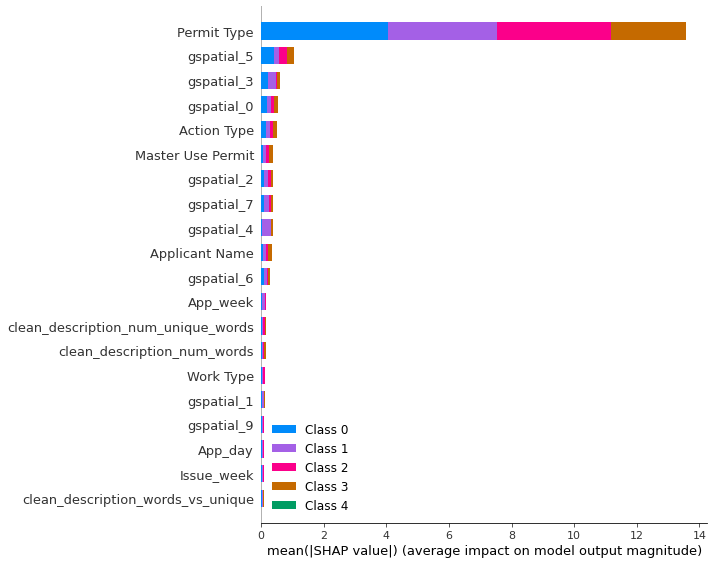

In [76]:
shap.summary_plot(shap_values, X)

In [77]:
print("\n The best score across ALL searched params:\n",
          catboost_model.best_score_)


 The best score across ALL searched params:
 {'learn': {'Accuracy': 0.9332114176671702, 'MultiClass': 0.20568194453416952}, 'validation': {'Accuracy': 0.8976744186046511, 'MultiClass': 0.2909150279982856}}


In [79]:
y_pred=catboost_model.predict(test_df)
y=train_df['Category']
y=le.fit_transform(y)
labels=y_pred.flatten()
test_df['Category']=le.inverse_transform(labels)
catboost_model1=pd.DataFrame(test_df,columns=['Application/Permit Number','Category'])
catboost_model1.to_csv('catsubmission.csv')

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/data/features_layout.cpp:94: All feature names should be different, but 'gspatial_0' used more than once.

## TFIDF text features

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("\n[TF-IDF] Term Frequency Inverse Document Frequency Stage")
df1=pd.DataFrame()
train_df_1=pd.DataFrame()
test_df_1=pd.DataFrame()
def tfidf(df):
    v = TfidfVectorizer(max_features=20)
    x= v.fit_transform(df['clean_description_nos_removed'])
    df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
    df = pd.concat([df, df1], axis=1)
    return df

train_df_1=tfidf(train_df)
test_df_1=tfidf(test_df)

train_df_1=train_df_1.drop(columns='clean_description_nos_removed',axis=1)
test_df_1=test_df_1.drop('clean_description_nos_removed',axis=1)


[TF-IDF] Term Frequency Inverse Document Frequency Stage


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [81]:
from sklearn.model_selection import train_test_split
y=train_df_1['Category']
X=train_df_1.drop('Category',axis=1)
y=le.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [82]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.002,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")
catboost_model.fit(X_train,y_train,cat_features=obj_col,eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7967321	test: 0.7946333	best: 0.7946333 (0)	total: 107ms	remaining: 2m 40s
1:	learn: 0.8003896	test: 0.8008348	best: 0.8008348 (1)	total: 213ms	remaining: 2m 39s
2:	learn: 0.8019798	test: 0.8038163	best: 0.8038163 (2)	total: 306ms	remaining: 2m 32s
3:	learn: 0.8015823	test: 0.8021467	best: 0.8038163 (2)	total: 396ms	remaining: 2m 27s
4:	learn: 0.8022581	test: 0.8019082	best: 0.8038163 (2)	total: 487ms	remaining: 2m 25s
5:	learn: 0.8016220	test: 0.8034586	best: 0.8038163 (2)	total: 574ms	remaining: 2m 22s
6:	learn: 0.8025761	test: 0.8044126	best: 0.8044126 (6)	total: 663ms	remaining: 2m 21s
7:	learn: 0.8028544	test: 0.8056052	best: 0.8056052 (7)	total: 755ms	remaining: 2m 20s
8:	learn: 0.8034905	test: 0.8053667	best: 0.8056052 (7)	total: 845ms	remaining: 2m 20s
9:	learn: 0.8032520	test: 0.8066786	best: 0.8066786 (9)	total: 934ms	remaining: 2m 19s
10:	learn: 0.8027749	test: 0.8054860	best: 0.8066786 (9)	total: 1.02s	remaining: 2m 18s
11:	learn: 0.8026954	test: 0.8050089	best:

95:	learn: 0.8053987	test: 0.8088253	best: 0.8091831 (44)	total: 8.22s	remaining: 2m
96:	learn: 0.8057963	test: 0.8088253	best: 0.8091831 (44)	total: 8.3s	remaining: 2m
97:	learn: 0.8057565	test: 0.8090638	best: 0.8091831 (44)	total: 8.37s	remaining: 1m 59s
98:	learn: 0.8055975	test: 0.8089445	best: 0.8091831 (44)	total: 8.45s	remaining: 1m 59s
99:	learn: 0.8057168	test: 0.8091831	best: 0.8091831 (44)	total: 8.52s	remaining: 1m 59s
100:	learn: 0.8057565	test: 0.8091831	best: 0.8091831 (44)	total: 8.6s	remaining: 1m 59s
101:	learn: 0.8058758	test: 0.8093023	best: 0.8093023 (101)	total: 8.69s	remaining: 1m 59s
102:	learn: 0.8060348	test: 0.8091831	best: 0.8093023 (101)	total: 8.77s	remaining: 1m 58s
103:	learn: 0.8056770	test: 0.8094216	best: 0.8094216 (103)	total: 8.85s	remaining: 1m 58s
104:	learn: 0.8061143	test: 0.8093023	best: 0.8094216 (103)	total: 8.93s	remaining: 1m 58s
105:	learn: 0.8063131	test: 0.8091831	best: 0.8094216 (103)	total: 9s	remaining: 1m 58s
106:	learn: 0.8060746	t

186:	learn: 0.8073865	test: 0.8104949	best: 0.8108527 (169)	total: 28.6s	remaining: 3m 20s
187:	learn: 0.8074263	test: 0.8107335	best: 0.8108527 (169)	total: 28.6s	remaining: 3m 19s
188:	learn: 0.8073070	test: 0.8106142	best: 0.8108527 (169)	total: 28.7s	remaining: 3m 19s
189:	learn: 0.8073467	test: 0.8103757	best: 0.8108527 (169)	total: 28.8s	remaining: 3m 18s
190:	learn: 0.8075455	test: 0.8104949	best: 0.8108527 (169)	total: 28.9s	remaining: 3m 17s
191:	learn: 0.8074660	test: 0.8106142	best: 0.8108527 (169)	total: 28.9s	remaining: 3m 17s
192:	learn: 0.8074660	test: 0.8103757	best: 0.8108527 (169)	total: 29s	remaining: 3m 16s
193:	learn: 0.8074660	test: 0.8103757	best: 0.8108527 (169)	total: 29.1s	remaining: 3m 15s
194:	learn: 0.8074660	test: 0.8104949	best: 0.8108527 (169)	total: 29.2s	remaining: 3m 15s
195:	learn: 0.8075058	test: 0.8104949	best: 0.8108527 (169)	total: 29.2s	remaining: 3m 14s
196:	learn: 0.8075853	test: 0.8103757	best: 0.8108527 (169)	total: 29.3s	remaining: 3m 13s
1

279:	learn: 0.8090165	test: 0.8122838	best: 0.8122838 (278)	total: 36.8s	remaining: 2m 40s
280:	learn: 0.8088574	test: 0.8121646	best: 0.8122838 (278)	total: 36.9s	remaining: 2m 40s
281:	learn: 0.8088574	test: 0.8124031	best: 0.8124031 (281)	total: 37s	remaining: 2m 40s
282:	learn: 0.8090165	test: 0.8124031	best: 0.8124031 (281)	total: 37s	remaining: 2m 39s
283:	learn: 0.8091357	test: 0.8125224	best: 0.8125224 (283)	total: 37.1s	remaining: 2m 39s
284:	learn: 0.8089369	test: 0.8127609	best: 0.8127609 (284)	total: 37.2s	remaining: 2m 39s
285:	learn: 0.8089767	test: 0.8126416	best: 0.8127609 (284)	total: 37.3s	remaining: 2m 38s
286:	learn: 0.8091357	test: 0.8126416	best: 0.8127609 (284)	total: 37.3s	remaining: 2m 38s
287:	learn: 0.8091357	test: 0.8125224	best: 0.8127609 (284)	total: 37.4s	remaining: 2m 37s
288:	learn: 0.8091755	test: 0.8126416	best: 0.8127609 (284)	total: 37.5s	remaining: 2m 37s
289:	learn: 0.8092152	test: 0.8127609	best: 0.8127609 (284)	total: 37.6s	remaining: 2m 37s
290

370:	learn: 0.8117198	test: 0.8129994	best: 0.8135957 (340)	total: 44.7s	remaining: 2m 16s
371:	learn: 0.8116005	test: 0.8128801	best: 0.8135957 (340)	total: 44.8s	remaining: 2m 16s
372:	learn: 0.8116403	test: 0.8127609	best: 0.8135957 (340)	total: 44.9s	remaining: 2m 15s
373:	learn: 0.8117596	test: 0.8129994	best: 0.8135957 (340)	total: 45s	remaining: 2m 15s
374:	learn: 0.8117596	test: 0.8128801	best: 0.8135957 (340)	total: 45s	remaining: 2m 15s
375:	learn: 0.8117198	test: 0.8128801	best: 0.8135957 (340)	total: 45.1s	remaining: 2m 15s
376:	learn: 0.8117596	test: 0.8128801	best: 0.8135957 (340)	total: 45.2s	remaining: 2m 14s
377:	learn: 0.8117198	test: 0.8129994	best: 0.8135957 (340)	total: 45.3s	remaining: 2m 14s
378:	learn: 0.8117596	test: 0.8129994	best: 0.8135957 (340)	total: 45.3s	remaining: 2m 14s
379:	learn: 0.8117993	test: 0.8131187	best: 0.8135957 (340)	total: 45.4s	remaining: 2m 14s
380:	learn: 0.8117596	test: 0.8131187	best: 0.8135957 (340)	total: 45.5s	remaining: 2m 13s
381

463:	learn: 0.8139063	test: 0.8152654	best: 0.8153846 (451)	total: 51.8s	remaining: 1m 55s
464:	learn: 0.8139461	test: 0.8155039	best: 0.8155039 (464)	total: 51.8s	remaining: 1m 55s
465:	learn: 0.8139461	test: 0.8155039	best: 0.8155039 (464)	total: 51.9s	remaining: 1m 55s
466:	learn: 0.8140256	test: 0.8155039	best: 0.8155039 (464)	total: 52s	remaining: 1m 55s
467:	learn: 0.8139063	test: 0.8155039	best: 0.8155039 (464)	total: 52.1s	remaining: 1m 55s
468:	learn: 0.8139063	test: 0.8155039	best: 0.8155039 (464)	total: 52.1s	remaining: 1m 54s
469:	learn: 0.8139063	test: 0.8155039	best: 0.8155039 (464)	total: 52.2s	remaining: 1m 54s
470:	learn: 0.8138666	test: 0.8155039	best: 0.8155039 (464)	total: 52.3s	remaining: 1m 54s
471:	learn: 0.8139461	test: 0.8153846	best: 0.8155039 (464)	total: 52.4s	remaining: 1m 54s
472:	learn: 0.8140256	test: 0.8156231	best: 0.8156231 (472)	total: 52.5s	remaining: 1m 54s
473:	learn: 0.8139461	test: 0.8156231	best: 0.8156231 (472)	total: 52.5s	remaining: 1m 53s
4

556:	learn: 0.8161326	test: 0.8163387	best: 0.8164580 (529)	total: 59.2s	remaining: 1m 40s
557:	learn: 0.8162121	test: 0.8163387	best: 0.8164580 (529)	total: 59.3s	remaining: 1m 40s
558:	learn: 0.8162916	test: 0.8163387	best: 0.8164580 (529)	total: 59.3s	remaining: 1m 40s
559:	learn: 0.8163314	test: 0.8161002	best: 0.8164580 (529)	total: 59.4s	remaining: 1m 39s
560:	learn: 0.8164109	test: 0.8159809	best: 0.8164580 (529)	total: 59.5s	remaining: 1m 39s
561:	learn: 0.8163314	test: 0.8158617	best: 0.8164580 (529)	total: 59.6s	remaining: 1m 39s
562:	learn: 0.8164904	test: 0.8159809	best: 0.8164580 (529)	total: 59.6s	remaining: 1m 39s
563:	learn: 0.8165302	test: 0.8159809	best: 0.8164580 (529)	total: 59.7s	remaining: 1m 39s
564:	learn: 0.8165699	test: 0.8159809	best: 0.8164580 (529)	total: 59.8s	remaining: 1m 39s
565:	learn: 0.8164507	test: 0.8159809	best: 0.8164580 (529)	total: 59.9s	remaining: 1m 38s
566:	learn: 0.8164109	test: 0.8158617	best: 0.8164580 (529)	total: 59.9s	remaining: 1m 38s

647:	learn: 0.8177626	test: 0.8169350	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 27s
648:	learn: 0.8178818	test: 0.8168157	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 27s
649:	learn: 0.8178421	test: 0.8169350	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 27s
650:	learn: 0.8180011	test: 0.8169350	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
651:	learn: 0.8180409	test: 0.8169350	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
652:	learn: 0.8180409	test: 0.8168157	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
653:	learn: 0.8180409	test: 0.8169350	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
654:	learn: 0.8181204	test: 0.8168157	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
655:	learn: 0.8181601	test: 0.8168157	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
656:	learn: 0.8182396	test: 0.8168157	best: 0.8169350 (637)	total: 1m 6s	remaining: 1m 26s
657:	learn: 0.8182794	test: 0.8168157	best: 0.8169350 (637)	total: 1m 7s	remaining: 1m 25s

739:	learn: 0.8194721	test: 0.8181276	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
740:	learn: 0.8194323	test: 0.8181276	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
741:	learn: 0.8194323	test: 0.8181276	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
742:	learn: 0.8195516	test: 0.8182469	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
743:	learn: 0.8195516	test: 0.8181276	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
744:	learn: 0.8195118	test: 0.8181276	best: 0.8184854 (711)	total: 1m 13s	remaining: 1m 15s
745:	learn: 0.8195118	test: 0.8180083	best: 0.8184854 (711)	total: 1m 14s	remaining: 1m 14s
746:	learn: 0.8195516	test: 0.8180083	best: 0.8184854 (711)	total: 1m 14s	remaining: 1m 14s
747:	learn: 0.8195118	test: 0.8178891	best: 0.8184854 (711)	total: 1m 14s	remaining: 1m 14s
748:	learn: 0.8195516	test: 0.8178891	best: 0.8184854 (711)	total: 1m 14s	remaining: 1m 14s
749:	learn: 0.8195516	test: 0.8180083	best: 0.8184854 (711)	total: 1m 14s	remain

829:	learn: 0.8215791	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 5s
830:	learn: 0.8215393	test: 0.8184854	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
831:	learn: 0.8215393	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
832:	learn: 0.8216586	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
833:	learn: 0.8216188	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
834:	learn: 0.8216188	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
835:	learn: 0.8216188	test: 0.8183661	best: 0.8184854 (711)	total: 1m 20s	remaining: 1m 4s
836:	learn: 0.8215393	test: 0.8182469	best: 0.8184854 (711)	total: 1m 21s	remaining: 1m 4s
837:	learn: 0.8216586	test: 0.8182469	best: 0.8184854 (711)	total: 1m 21s	remaining: 1m 4s
838:	learn: 0.8216586	test: 0.8182469	best: 0.8184854 (711)	total: 1m 21s	remaining: 1m 4s
839:	learn: 0.8216188	test: 0.8182469	best: 0.8184854 (711)	total: 1m 21s	remaining: 1m 3s

920:	learn: 0.8229705	test: 0.8197973	best: 0.8199165 (918)	total: 1m 27s	remaining: 55s
921:	learn: 0.8229705	test: 0.8197973	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.9s
922:	learn: 0.8229307	test: 0.8196780	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.8s
923:	learn: 0.8229307	test: 0.8196780	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.7s
924:	learn: 0.8230500	test: 0.8197973	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.6s
925:	learn: 0.8230500	test: 0.8199165	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.5s
926:	learn: 0.8230103	test: 0.8197973	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.4s
927:	learn: 0.8230500	test: 0.8197973	best: 0.8199165 (918)	total: 1m 27s	remaining: 54.3s
928:	learn: 0.8231295	test: 0.8197973	best: 0.8199165 (918)	total: 1m 28s	remaining: 54.2s
929:	learn: 0.8231295	test: 0.8197973	best: 0.8199165 (918)	total: 1m 28s	remaining: 54.1s
930:	learn: 0.8230898	test: 0.8197973	best: 0.8199165 (918)	total: 1m 28s	remaining: 54s
931

1011:	learn: 0.8249583	test: 0.8200358	best: 0.8203936 (992)	total: 1m 34s	remaining: 45.7s
1012:	learn: 0.8249583	test: 0.8200358	best: 0.8203936 (992)	total: 1m 34s	remaining: 45.6s
1013:	learn: 0.8250378	test: 0.8199165	best: 0.8203936 (992)	total: 1m 34s	remaining: 45.5s
1014:	learn: 0.8250378	test: 0.8199165	best: 0.8203936 (992)	total: 1m 34s	remaining: 45.4s
1015:	learn: 0.8250378	test: 0.8200358	best: 0.8203936 (992)	total: 1m 34s	remaining: 45.3s
1016:	learn: 0.8250378	test: 0.8199165	best: 0.8203936 (992)	total: 1m 35s	remaining: 45.2s
1017:	learn: 0.8250378	test: 0.8200358	best: 0.8203936 (992)	total: 1m 35s	remaining: 45.1s
1018:	learn: 0.8249980	test: 0.8199165	best: 0.8203936 (992)	total: 1m 35s	remaining: 45s
1019:	learn: 0.8249980	test: 0.8200358	best: 0.8203936 (992)	total: 1m 35s	remaining: 44.9s
1020:	learn: 0.8250378	test: 0.8200358	best: 0.8203936 (992)	total: 1m 35s	remaining: 44.8s
1021:	learn: 0.8250378	test: 0.8199165	best: 0.8203936 (992)	total: 1m 35s	remaini

1103:	learn: 0.8271448	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 41s	remaining: 36.5s
1104:	learn: 0.8272641	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 41s	remaining: 36.4s
1105:	learn: 0.8273038	test: 0.8205128	best: 0.8206321 (1096)	total: 1m 41s	remaining: 36.3s
1106:	learn: 0.8273038	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 41s	remaining: 36.2s
1107:	learn: 0.8272641	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 41s	remaining: 36.1s
1108:	learn: 0.8273038	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 42s	remaining: 36s
1109:	learn: 0.8274231	test: 0.8206321	best: 0.8206321 (1096)	total: 1m 42s	remaining: 35.9s
1110:	learn: 0.8274628	test: 0.8207513	best: 0.8207513 (1110)	total: 1m 42s	remaining: 35.8s
1111:	learn: 0.8275026	test: 0.8206321	best: 0.8207513 (1110)	total: 1m 42s	remaining: 35.7s
1112:	learn: 0.8274231	test: 0.8206321	best: 0.8207513 (1110)	total: 1m 42s	remaining: 35.6s
1113:	learn: 0.8276218	test: 0.8205128	best: 0.8207513 (1110)	total: 1m 

1193:	learn: 0.8300469	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.8s
1194:	learn: 0.8301264	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.7s
1195:	learn: 0.8301662	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.6s
1196:	learn: 0.8302059	test: 0.8225403	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.5s
1197:	learn: 0.8302854	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.4s
1198:	learn: 0.8303650	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.3s
1199:	learn: 0.8304047	test: 0.8226595	best: 0.8226595 (1192)	total: 1m 48s	remaining: 27.2s
1200:	learn: 0.8304047	test: 0.8227788	best: 0.8227788 (1200)	total: 1m 48s	remaining: 27.1s
1201:	learn: 0.8304445	test: 0.8228980	best: 0.8228980 (1201)	total: 1m 48s	remaining: 27s
1202:	learn: 0.8304445	test: 0.8227788	best: 0.8228980 (1201)	total: 1m 48s	remaining: 26.9s
1203:	learn: 0.8305637	test: 0.8227788	best: 0.8228980 (1201)	total: 1m 

1285:	learn: 0.8315179	test: 0.8230173	best: 0.8233751 (1220)	total: 1m 54s	remaining: 19.1s
1286:	learn: 0.8316371	test: 0.8230173	best: 0.8233751 (1220)	total: 1m 55s	remaining: 19.1s
1287:	learn: 0.8315974	test: 0.8230173	best: 0.8233751 (1220)	total: 1m 55s	remaining: 19s
1288:	learn: 0.8315974	test: 0.8230173	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.9s
1289:	learn: 0.8315974	test: 0.8230173	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.8s
1290:	learn: 0.8315576	test: 0.8231366	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.7s
1291:	learn: 0.8316371	test: 0.8231366	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.6s
1292:	learn: 0.8315576	test: 0.8231366	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.5s
1293:	learn: 0.8315576	test: 0.8231366	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.4s
1294:	learn: 0.8315974	test: 0.8233751	best: 0.8233751 (1220)	total: 1m 55s	remaining: 18.3s
1295:	learn: 0.8315974	test: 0.8234943	best: 0.8234943 (1295)	total: 1m 

1375:	learn: 0.8332273	test: 0.8244484	best: 0.8244484 (1358)	total: 2m 1s	remaining: 11s
1376:	learn: 0.8331876	test: 0.8244484	best: 0.8244484 (1358)	total: 2m 1s	remaining: 10.9s
1377:	learn: 0.8331876	test: 0.8244484	best: 0.8244484 (1358)	total: 2m 1s	remaining: 10.8s
1378:	learn: 0.8331876	test: 0.8242099	best: 0.8244484 (1358)	total: 2m 1s	remaining: 10.7s
1379:	learn: 0.8331478	test: 0.8243292	best: 0.8244484 (1358)	total: 2m 1s	remaining: 10.6s
1380:	learn: 0.8331876	test: 0.8244484	best: 0.8244484 (1358)	total: 2m 1s	remaining: 10.5s
1381:	learn: 0.8332273	test: 0.8244484	best: 0.8244484 (1358)	total: 2m 2s	remaining: 10.4s
1382:	learn: 0.8332273	test: 0.8243292	best: 0.8244484 (1358)	total: 2m 2s	remaining: 10.3s
1383:	learn: 0.8331876	test: 0.8243292	best: 0.8244484 (1358)	total: 2m 2s	remaining: 10.2s
1384:	learn: 0.8332273	test: 0.8243292	best: 0.8244484 (1358)	total: 2m 2s	remaining: 10.2s
1385:	learn: 0.8331876	test: 0.8243292	best: 0.8244484 (1358)	total: 2m 2s	remaini

1467:	learn: 0.8342610	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.8s
1468:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.71s
1469:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.62s
1470:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.53s
1471:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.45s
1472:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.36s
1473:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.27s
1474:	learn: 0.8342212	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.18s
1475:	learn: 0.8342610	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.1s
1476:	learn: 0.8342610	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 8s	remaining: 2.01s
1477:	learn: 0.8342610	test: 0.8250447	best: 0.8251640 (1462)	total: 2m 9s	remaini

### Explaining Dashboard

In [83]:
cat=['Permit Type', 'Action Type', 'Work Type', 'Applicant Name', 'Status', 'Contractor']
enc = OrdinalEncoder()
categorical_features = pd.DataFrame(enc.fit_transform(train_df_1[cat].values), columns=cat)
train_df_2=train_df_1.drop(columns=cat,axis=1)
train_df_2=pd.concat([categorical_features,train_df_2],axis=1)

In [84]:
from sklearn.model_selection import train_test_split
y=train_df_2['Category']
X=train_df_2.drop('Category',axis=1)
y=le.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [85]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.002,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")


catboost_model.fit(X_train,y_train,eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7832949	test: 0.7681574	best: 0.7681574 (0)	total: 70.4ms	remaining: 1m 45s
1:	learn: 0.7852031	test: 0.7723315	best: 0.7723315 (1)	total: 133ms	remaining: 1m 39s
2:	learn: 0.7853622	test: 0.7740012	best: 0.7740012 (2)	total: 193ms	remaining: 1m 36s
3:	learn: 0.7873102	test: 0.7760286	best: 0.7760286 (3)	total: 252ms	remaining: 1m 34s
4:	learn: 0.7916037	test: 0.7805605	best: 0.7805605 (4)	total: 311ms	remaining: 1m 33s
5:	learn: 0.7916037	test: 0.7817531	best: 0.7817531 (5)	total: 368ms	remaining: 1m 31s
6:	learn: 0.7917627	test: 0.7815146	best: 0.7817531 (5)	total: 424ms	remaining: 1m 30s
7:	learn: 0.7924386	test: 0.7838998	best: 0.7838998 (7)	total: 478ms	remaining: 1m 29s
8:	learn: 0.7928361	test: 0.7822302	best: 0.7838998 (7)	total: 531ms	remaining: 1m 27s
9:	learn: 0.7936710	test: 0.7846154	best: 0.7846154 (9)	total: 587ms	remaining: 1m 27s
10:	learn: 0.7938300	test: 0.7837806	best: 0.7846154 (9)	total: 649ms	remaining: 1m 27s
11:	learn: 0.7944661	test: 0.7834228	best

96:	learn: 0.7935517	test: 0.7829457	best: 0.7858080 (19)	total: 5.42s	remaining: 1m 18s
97:	learn: 0.7936710	test: 0.7828265	best: 0.7858080 (19)	total: 5.47s	remaining: 1m 18s
98:	learn: 0.7941083	test: 0.7829457	best: 0.7858080 (19)	total: 5.53s	remaining: 1m 18s
99:	learn: 0.7941878	test: 0.7831843	best: 0.7858080 (19)	total: 5.58s	remaining: 1m 18s
100:	learn: 0.7939493	test: 0.7830650	best: 0.7858080 (19)	total: 5.64s	remaining: 1m 18s
101:	learn: 0.7941878	test: 0.7829457	best: 0.7858080 (19)	total: 5.69s	remaining: 1m 18s
102:	learn: 0.7939493	test: 0.7830650	best: 0.7858080 (19)	total: 5.75s	remaining: 1m 17s
103:	learn: 0.7937903	test: 0.7828265	best: 0.7858080 (19)	total: 5.8s	remaining: 1m 17s
104:	learn: 0.7937903	test: 0.7829457	best: 0.7858080 (19)	total: 5.86s	remaining: 1m 17s
105:	learn: 0.7939095	test: 0.7824687	best: 0.7858080 (19)	total: 5.92s	remaining: 1m 17s
106:	learn: 0.7937903	test: 0.7828265	best: 0.7858080 (19)	total: 5.97s	remaining: 1m 17s
107:	learn: 0.7

189:	learn: 0.7963743	test: 0.7853309	best: 0.7858080 (19)	total: 10.6s	remaining: 1m 12s
190:	learn: 0.7965334	test: 0.7852117	best: 0.7858080 (19)	total: 10.6s	remaining: 1m 12s
191:	learn: 0.7963743	test: 0.7850924	best: 0.7858080 (19)	total: 10.7s	remaining: 1m 12s
192:	learn: 0.7963743	test: 0.7852117	best: 0.7858080 (19)	total: 10.7s	remaining: 1m 12s
193:	learn: 0.7963743	test: 0.7853309	best: 0.7858080 (19)	total: 10.8s	remaining: 1m 12s
194:	learn: 0.7964141	test: 0.7853309	best: 0.7858080 (19)	total: 10.8s	remaining: 1m 12s
195:	learn: 0.7965334	test: 0.7849732	best: 0.7858080 (19)	total: 10.9s	remaining: 1m 12s
196:	learn: 0.7965334	test: 0.7853309	best: 0.7858080 (19)	total: 10.9s	remaining: 1m 12s
197:	learn: 0.7965731	test: 0.7852117	best: 0.7858080 (19)	total: 11s	remaining: 1m 12s
198:	learn: 0.7967321	test: 0.7852117	best: 0.7858080 (19)	total: 11s	remaining: 1m 12s
199:	learn: 0.7969707	test: 0.7852117	best: 0.7858080 (19)	total: 11.1s	remaining: 1m 12s
200:	learn: 0.

281:	learn: 0.7991572	test: 0.7871199	best: 0.7872391 (250)	total: 15.5s	remaining: 1m 7s
282:	learn: 0.7991572	test: 0.7870006	best: 0.7872391 (250)	total: 15.6s	remaining: 1m 6s
283:	learn: 0.7991969	test: 0.7871199	best: 0.7872391 (250)	total: 15.6s	remaining: 1m 6s
284:	learn: 0.7993957	test: 0.7873584	best: 0.7873584 (284)	total: 15.7s	remaining: 1m 6s
285:	learn: 0.7995547	test: 0.7874776	best: 0.7874776 (285)	total: 15.7s	remaining: 1m 6s
286:	learn: 0.7994355	test: 0.7873584	best: 0.7874776 (285)	total: 15.8s	remaining: 1m 6s
287:	learn: 0.7995150	test: 0.7873584	best: 0.7874776 (285)	total: 15.8s	remaining: 1m 6s
288:	learn: 0.7993957	test: 0.7875969	best: 0.7875969 (288)	total: 15.9s	remaining: 1m 6s
289:	learn: 0.7994355	test: 0.7875969	best: 0.7875969 (288)	total: 15.9s	remaining: 1m 6s
290:	learn: 0.7996343	test: 0.7878354	best: 0.7878354 (290)	total: 16s	remaining: 1m 6s
291:	learn: 0.7995547	test: 0.7878354	best: 0.7878354 (290)	total: 16.1s	remaining: 1m 6s
292:	learn: 

377:	learn: 0.8030532	test: 0.7899821	best: 0.7899821 (374)	total: 20.7s	remaining: 1m 1s
378:	learn: 0.8030532	test: 0.7899821	best: 0.7899821 (374)	total: 20.7s	remaining: 1m 1s
379:	learn: 0.8031725	test: 0.7901014	best: 0.7901014 (379)	total: 20.8s	remaining: 1m 1s
380:	learn: 0.8034110	test: 0.7903399	best: 0.7903399 (380)	total: 20.8s	remaining: 1m 1s
381:	learn: 0.8030929	test: 0.7901014	best: 0.7903399 (380)	total: 20.9s	remaining: 1m 1s
382:	learn: 0.8031725	test: 0.7901014	best: 0.7903399 (380)	total: 20.9s	remaining: 1m 1s
383:	learn: 0.8034905	test: 0.7904592	best: 0.7904592 (383)	total: 21s	remaining: 1m 1s
384:	learn: 0.8032917	test: 0.7898629	best: 0.7904592 (383)	total: 21.1s	remaining: 1m
385:	learn: 0.8033712	test: 0.7899821	best: 0.7904592 (383)	total: 21.1s	remaining: 1m
386:	learn: 0.8035303	test: 0.7904592	best: 0.7904592 (383)	total: 21.2s	remaining: 1m
387:	learn: 0.8035303	test: 0.7904592	best: 0.7904592 (383)	total: 21.2s	remaining: 1m
388:	learn: 0.8036098	te

469:	learn: 0.8057565	test: 0.7910555	best: 0.7912940 (466)	total: 25.6s	remaining: 56.1s
470:	learn: 0.8057565	test: 0.7911747	best: 0.7912940 (466)	total: 25.7s	remaining: 56.1s
471:	learn: 0.8058360	test: 0.7910555	best: 0.7912940 (466)	total: 25.7s	remaining: 56s
472:	learn: 0.8057963	test: 0.7910555	best: 0.7912940 (466)	total: 25.8s	remaining: 56s
473:	learn: 0.8057963	test: 0.7910555	best: 0.7912940 (466)	total: 25.8s	remaining: 55.9s
474:	learn: 0.8058360	test: 0.7909362	best: 0.7912940 (466)	total: 25.9s	remaining: 55.9s
475:	learn: 0.8057963	test: 0.7910555	best: 0.7912940 (466)	total: 26s	remaining: 55.8s
476:	learn: 0.8058360	test: 0.7911747	best: 0.7912940 (466)	total: 26s	remaining: 55.8s
477:	learn: 0.8058360	test: 0.7910555	best: 0.7912940 (466)	total: 26.1s	remaining: 55.7s
478:	learn: 0.8057963	test: 0.7909362	best: 0.7912940 (466)	total: 26.1s	remaining: 55.7s
479:	learn: 0.8059553	test: 0.7909362	best: 0.7912940 (466)	total: 26.2s	remaining: 55.6s
480:	learn: 0.8059

562:	learn: 0.8082214	test: 0.7922481	best: 0.7922481 (553)	total: 30.7s	remaining: 51.1s
563:	learn: 0.8083804	test: 0.7923673	best: 0.7923673 (563)	total: 30.8s	remaining: 51.1s
564:	learn: 0.8082611	test: 0.7922481	best: 0.7923673 (563)	total: 30.8s	remaining: 51s
565:	learn: 0.8083804	test: 0.7922481	best: 0.7923673 (563)	total: 30.9s	remaining: 51s
566:	learn: 0.8086189	test: 0.7922481	best: 0.7923673 (563)	total: 30.9s	remaining: 50.9s
567:	learn: 0.8085792	test: 0.7921288	best: 0.7923673 (563)	total: 31s	remaining: 50.9s
568:	learn: 0.8085792	test: 0.7921288	best: 0.7923673 (563)	total: 31.1s	remaining: 50.8s
569:	learn: 0.8086189	test: 0.7920095	best: 0.7923673 (563)	total: 31.1s	remaining: 50.8s
570:	learn: 0.8086587	test: 0.7920095	best: 0.7923673 (563)	total: 31.2s	remaining: 50.7s
571:	learn: 0.8085394	test: 0.7920095	best: 0.7923673 (563)	total: 31.2s	remaining: 50.7s
572:	learn: 0.8086587	test: 0.7918903	best: 0.7923673 (563)	total: 31.3s	remaining: 50.6s
573:	learn: 0.80

656:	learn: 0.8104476	test: 0.7934407	best: 0.7935599 (647)	total: 36s	remaining: 46.2s
657:	learn: 0.8104079	test: 0.7935599	best: 0.7935599 (647)	total: 36.1s	remaining: 46.2s
658:	learn: 0.8104476	test: 0.7936792	best: 0.7936792 (658)	total: 36.1s	remaining: 46.1s
659:	learn: 0.8104476	test: 0.7936792	best: 0.7936792 (658)	total: 36.2s	remaining: 46s
660:	learn: 0.8105272	test: 0.7936792	best: 0.7936792 (658)	total: 36.2s	remaining: 46s
661:	learn: 0.8105669	test: 0.7937984	best: 0.7937984 (661)	total: 36.3s	remaining: 45.9s
662:	learn: 0.8106067	test: 0.7937984	best: 0.7937984 (661)	total: 36.3s	remaining: 45.9s
663:	learn: 0.8105669	test: 0.7937984	best: 0.7937984 (661)	total: 36.4s	remaining: 45.8s
664:	learn: 0.8106862	test: 0.7937984	best: 0.7937984 (661)	total: 36.5s	remaining: 45.8s
665:	learn: 0.8107259	test: 0.7937984	best: 0.7937984 (661)	total: 36.5s	remaining: 45.7s
666:	learn: 0.8108054	test: 0.7937984	best: 0.7937984 (661)	total: 36.6s	remaining: 45.7s
667:	learn: 0.81

748:	learn: 0.8122764	test: 0.7946333	best: 0.7948718 (727)	total: 41.4s	remaining: 41.5s
749:	learn: 0.8121969	test: 0.7945140	best: 0.7948718 (727)	total: 41.4s	remaining: 41.4s
750:	learn: 0.8121969	test: 0.7943948	best: 0.7948718 (727)	total: 41.5s	remaining: 41.4s
751:	learn: 0.8121571	test: 0.7945140	best: 0.7948718 (727)	total: 41.5s	remaining: 41.3s
752:	learn: 0.8121969	test: 0.7946333	best: 0.7948718 (727)	total: 41.6s	remaining: 41.2s
753:	learn: 0.8122764	test: 0.7946333	best: 0.7948718 (727)	total: 41.6s	remaining: 41.2s
754:	learn: 0.8122764	test: 0.7946333	best: 0.7948718 (727)	total: 41.7s	remaining: 41.1s
755:	learn: 0.8122764	test: 0.7946333	best: 0.7948718 (727)	total: 41.8s	remaining: 41.1s
756:	learn: 0.8122764	test: 0.7946333	best: 0.7948718 (727)	total: 41.8s	remaining: 41s
757:	learn: 0.8122764	test: 0.7945140	best: 0.7948718 (727)	total: 41.9s	remaining: 41s
758:	learn: 0.8122366	test: 0.7945140	best: 0.7948718 (727)	total: 41.9s	remaining: 40.9s
759:	learn: 0.

840:	learn: 0.8137871	test: 0.7949911	best: 0.7952296 (835)	total: 46.6s	remaining: 36.5s
841:	learn: 0.8137871	test: 0.7952296	best: 0.7952296 (835)	total: 46.7s	remaining: 36.5s
842:	learn: 0.8137473	test: 0.7953488	best: 0.7953488 (842)	total: 46.7s	remaining: 36.4s
843:	learn: 0.8139461	test: 0.7952296	best: 0.7953488 (842)	total: 46.8s	remaining: 36.4s
844:	learn: 0.8140654	test: 0.7952296	best: 0.7953488 (842)	total: 46.8s	remaining: 36.3s
845:	learn: 0.8140256	test: 0.7953488	best: 0.7953488 (842)	total: 46.9s	remaining: 36.2s
846:	learn: 0.8140256	test: 0.7953488	best: 0.7953488 (842)	total: 46.9s	remaining: 36.2s
847:	learn: 0.8140256	test: 0.7953488	best: 0.7953488 (842)	total: 47s	remaining: 36.1s
848:	learn: 0.8141449	test: 0.7953488	best: 0.7953488 (842)	total: 47s	remaining: 36.1s
849:	learn: 0.8141449	test: 0.7952296	best: 0.7953488 (842)	total: 47.1s	remaining: 36s
850:	learn: 0.8141449	test: 0.7953488	best: 0.7953488 (842)	total: 47.1s	remaining: 36s
851:	learn: 0.8140

935:	learn: 0.8162121	test: 0.7976148	best: 0.7976148 (932)	total: 52s	remaining: 31.4s
936:	learn: 0.8162916	test: 0.7976148	best: 0.7976148 (932)	total: 52.1s	remaining: 31.3s
937:	learn: 0.8163314	test: 0.7976148	best: 0.7976148 (932)	total: 52.2s	remaining: 31.3s
938:	learn: 0.8163712	test: 0.7976148	best: 0.7976148 (932)	total: 52.2s	remaining: 31.2s
939:	learn: 0.8164109	test: 0.7979726	best: 0.7979726 (939)	total: 52.3s	remaining: 31.1s
940:	learn: 0.8164109	test: 0.7979726	best: 0.7979726 (939)	total: 52.3s	remaining: 31.1s
941:	learn: 0.8163712	test: 0.7979726	best: 0.7979726 (939)	total: 52.4s	remaining: 31s
942:	learn: 0.8163314	test: 0.7979726	best: 0.7979726 (939)	total: 52.5s	remaining: 31s
943:	learn: 0.8162916	test: 0.7976148	best: 0.7979726 (939)	total: 52.5s	remaining: 30.9s
944:	learn: 0.8163314	test: 0.7978533	best: 0.7979726 (939)	total: 52.6s	remaining: 30.9s
945:	learn: 0.8162519	test: 0.7979726	best: 0.7979726 (939)	total: 52.6s	remaining: 30.8s
946:	learn: 0.81

1026:	learn: 0.8181204	test: 0.7991652	best: 0.7995230 (1019)	total: 57.2s	remaining: 26.3s
1027:	learn: 0.8181999	test: 0.7991652	best: 0.7995230 (1019)	total: 57.3s	remaining: 26.3s
1028:	learn: 0.8180409	test: 0.7991652	best: 0.7995230 (1019)	total: 57.3s	remaining: 26.2s
1029:	learn: 0.8180806	test: 0.7991652	best: 0.7995230 (1019)	total: 57.4s	remaining: 26.2s
1030:	learn: 0.8180806	test: 0.7991652	best: 0.7995230 (1019)	total: 57.4s	remaining: 26.1s
1031:	learn: 0.8181204	test: 0.7991652	best: 0.7995230 (1019)	total: 57.5s	remaining: 26.1s
1032:	learn: 0.8181204	test: 0.7991652	best: 0.7995230 (1019)	total: 57.6s	remaining: 26s
1033:	learn: 0.8181601	test: 0.7995230	best: 0.7995230 (1019)	total: 57.6s	remaining: 26s
1034:	learn: 0.8182396	test: 0.7994037	best: 0.7995230 (1019)	total: 57.7s	remaining: 25.9s
1035:	learn: 0.8182794	test: 0.7994037	best: 0.7995230 (1019)	total: 57.7s	remaining: 25.9s
1036:	learn: 0.8183192	test: 0.7995230	best: 0.7995230 (1019)	total: 57.8s	remaining

1117:	learn: 0.8200684	test: 0.8005963	best: 0.8005963 (1117)	total: 1m 2s	remaining: 21.3s
1118:	learn: 0.8200684	test: 0.8005963	best: 0.8005963 (1117)	total: 1m 2s	remaining: 21.2s
1119:	learn: 0.8200286	test: 0.8008348	best: 0.8008348 (1119)	total: 1m 2s	remaining: 21.2s
1120:	learn: 0.8200684	test: 0.8005963	best: 0.8008348 (1119)	total: 1m 2s	remaining: 21.1s
1121:	learn: 0.8200684	test: 0.8008348	best: 0.8008348 (1119)	total: 1m 2s	remaining: 21.1s
1122:	learn: 0.8201876	test: 0.8004770	best: 0.8008348 (1119)	total: 1m 2s	remaining: 21s
1123:	learn: 0.8201876	test: 0.8004770	best: 0.8008348 (1119)	total: 1m 2s	remaining: 20.9s
1124:	learn: 0.8202274	test: 0.8005963	best: 0.8008348 (1119)	total: 1m 2s	remaining: 20.9s
1125:	learn: 0.8201876	test: 0.8007156	best: 0.8008348 (1119)	total: 1m 2s	remaining: 20.8s
1126:	learn: 0.8202274	test: 0.8005963	best: 0.8008348 (1119)	total: 1m 2s	remaining: 20.8s
1127:	learn: 0.8201479	test: 0.8007156	best: 0.8008348 (1119)	total: 1m 2s	remaini

1207:	learn: 0.8209430	test: 0.8013119	best: 0.8013119 (1142)	total: 1m 7s	remaining: 16.2s
1208:	learn: 0.8209430	test: 0.8013119	best: 0.8013119 (1142)	total: 1m 7s	remaining: 16.2s
1209:	learn: 0.8210623	test: 0.8013119	best: 0.8013119 (1142)	total: 1m 7s	remaining: 16.1s
1210:	learn: 0.8210623	test: 0.8013119	best: 0.8013119 (1142)	total: 1m 7s	remaining: 16.1s
1211:	learn: 0.8211418	test: 0.8013119	best: 0.8013119 (1142)	total: 1m 7s	remaining: 16s
1212:	learn: 0.8211815	test: 0.8011926	best: 0.8013119 (1142)	total: 1m 7s	remaining: 15.9s
1213:	learn: 0.8212213	test: 0.8014311	best: 0.8014311 (1213)	total: 1m 7s	remaining: 15.9s
1214:	learn: 0.8212610	test: 0.8014311	best: 0.8014311 (1213)	total: 1m 7s	remaining: 15.8s
1215:	learn: 0.8212610	test: 0.8014311	best: 0.8014311 (1213)	total: 1m 7s	remaining: 15.8s
1216:	learn: 0.8213008	test: 0.8015504	best: 0.8015504 (1216)	total: 1m 7s	remaining: 15.7s
1217:	learn: 0.8212610	test: 0.8015504	best: 0.8015504 (1216)	total: 1m 7s	remaini

1296:	learn: 0.8225332	test: 0.8022660	best: 0.8025045 (1243)	total: 1m 11s	remaining: 11.3s
1297:	learn: 0.8225332	test: 0.8023852	best: 0.8025045 (1243)	total: 1m 11s	remaining: 11.2s
1298:	learn: 0.8225332	test: 0.8022660	best: 0.8025045 (1243)	total: 1m 12s	remaining: 11.1s
1299:	learn: 0.8225332	test: 0.8022660	best: 0.8025045 (1243)	total: 1m 12s	remaining: 11.1s
1300:	learn: 0.8225332	test: 0.8021467	best: 0.8025045 (1243)	total: 1m 12s	remaining: 11s
1301:	learn: 0.8226525	test: 0.8021467	best: 0.8025045 (1243)	total: 1m 12s	remaining: 11s
1302:	learn: 0.8226525	test: 0.8023852	best: 0.8025045 (1243)	total: 1m 12s	remaining: 10.9s
1303:	learn: 0.8226127	test: 0.8021467	best: 0.8025045 (1243)	total: 1m 12s	remaining: 10.9s
1304:	learn: 0.8226922	test: 0.8021467	best: 0.8025045 (1243)	total: 1m 12s	remaining: 10.8s
1305:	learn: 0.8226525	test: 0.8020274	best: 0.8025045 (1243)	total: 1m 12s	remaining: 10.8s
1306:	learn: 0.8226922	test: 0.8019082	best: 0.8025045 (1243)	total: 1m 12

1385:	learn: 0.8244414	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.3s
1386:	learn: 0.8245210	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.25s
1387:	learn: 0.8245607	test: 0.8027430	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.2s
1388:	learn: 0.8247197	test: 0.8026237	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.14s
1389:	learn: 0.8247197	test: 0.8027430	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.08s
1390:	learn: 0.8247197	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 16s	remaining: 6.03s
1391:	learn: 0.8247197	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 16s	remaining: 5.97s
1392:	learn: 0.8247992	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 17s	remaining: 5.92s
1393:	learn: 0.8247595	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 17s	remaining: 5.86s
1394:	learn: 0.8247595	test: 0.8027430	best: 0.8028623 (1379)	total: 1m 17s	remaining: 5.81s
1395:	learn: 0.8247197	test: 0.8028623	best: 0.8028623 (1379)	total: 1m 

1476:	learn: 0.8259521	test: 0.8039356	best: 0.8039356 (1460)	total: 1m 21s	remaining: 1.27s
1477:	learn: 0.8260316	test: 0.8039356	best: 0.8039356 (1460)	total: 1m 21s	remaining: 1.21s
1478:	learn: 0.8259124	test: 0.8041741	best: 0.8041741 (1478)	total: 1m 21s	remaining: 1.16s
1479:	learn: 0.8259919	test: 0.8041741	best: 0.8041741 (1478)	total: 1m 21s	remaining: 1.1s
1480:	learn: 0.8261509	test: 0.8042934	best: 0.8042934 (1480)	total: 1m 21s	remaining: 1.05s
1481:	learn: 0.8260714	test: 0.8041741	best: 0.8042934 (1480)	total: 1m 21s	remaining: 992ms
1482:	learn: 0.8261112	test: 0.8041741	best: 0.8042934 (1480)	total: 1m 21s	remaining: 937ms
1483:	learn: 0.8262304	test: 0.8044126	best: 0.8044126 (1483)	total: 1m 21s	remaining: 882ms
1484:	learn: 0.8263099	test: 0.8042934	best: 0.8044126 (1483)	total: 1m 21s	remaining: 827ms
1485:	learn: 0.8261907	test: 0.8042934	best: 0.8044126 (1483)	total: 1m 21s	remaining: 772ms
1486:	learn: 0.8261907	test: 0.8044126	best: 0.8044126 (1483)	total: 1m

In [86]:
from explainerdashboard import ExplainerDashboard
from explainerdashboard import ClassifierExplainer

explainer = ClassifierExplainer(catboost_model, X_test, y_test,model_output='logodds')
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pr auc curves...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating predictions...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pred_percentiles...
Calculating confusion matrices...
Calculating metrics...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and rel

 * Running on all addresses.
 * Running on http://192.168.203.81:8050/ (Press CTRL+C to quit)
192.168.203.81 - - [18/May/2022 20:47:16] "GET / HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1618483553.14.0.min.js HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1618483553.8.7.min.js HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /assets/bootstrap.min.css?m=1618484406.7008016 HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1618483553.7.2.min.js HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1618483553.14.0.min.js HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:47:16] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_16_0m1618483554.min.js HTTP/1.1" 200 -
192.168

192.168.203.81 - - [18/May/2022 20:47:26] "GET /_dash-component-suites/dash_core_components/async-slider.v1_16_0m1617903285.js HTTP/1.1" 200 -
192.168.203.81 - - [18/May/2022 20:48:13] "POST /_dash-update-component HTTP/1.1" 200 -


### Manual Changes

In [ ]:
# catboost_model_1=CatBoostClassifier(iterations=1500,
#                                   depth=10,
#                                   learning_rate=0.001,
#                                   eval_metric='Accuracy',
#                                   loss_function='MultiClass',
#                                   task_type="GPU")

# train_pool=Pool(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# test_pool=Pool(X_test,y_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# catboost_model_1.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)


## from Hyperparameter secondDynamic CV Aproach best parameters

In [ ]:
# parameters={'nan_mode': 'Min',
#             'gpu_ram_part': 0.95,
#             'eval_metric': 'Accuracy', 
#             'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'], 'iterations': 15, 'fold_permutation_block': 64, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain', 'ctr_history_unit': 'Sample', 'feature_border_type': 'GreedyLogSum', 'one_hot_max_size': 2, 'devices': '0:1', 'l2_leaf_reg': 7, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False,'max_ctr_complexity': 1, 'gpu_cat_features_storage': 'GpuRam', 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'FeatureFreq:CtrBorderCount=15:CtrBorderType=MinEntropy:Prior=0/1'], 'use_best_model': False, 'class_names': [0, 1, 2, 3, 4], 'random_seed': 0, 'depth': 9, 'ctr_target_border_count': 1, 'has_time': False, 'border_count': 128,'data_partition': 'DocParallel', 'bagging_temperature': 1, 'classes_count': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.7778555750846863, 'text_processing': {'dictionaries': [{'start_token_id': '0', 'occurrence_lower_bound': '5', 'skip_step': '0', 'end_of_word_token_policy': 'Insert', 'token_level_type': 'Word', 'end_of_sentence_token_policy': 'Skip', 'gram_order': '2', 'max_dictionary_size': '50000', 'dictionary_id': 'BiGram'}, {'start_token_id': '0', 'occurrence_lower_bound': '5', 'skip_step': '0', 'end_of_word_token_policy': 'Insert', 'token_level_type': 'Word', 'end_of_sentence_token_policy': 'Skip', 'gram_order': '1', 'max_dictionary_size': '50000', 'dictionary_id': 'Word'}], 'feature_processing': {'default': [{'dictionaries_names': ['BiGram', 'Word'], 'feature_calcers': ['BoW'], 'tokenizers_names': ['Space']}, {'dictionaries_names': ['Word'], 'feature_calcers': ['NaiveBayes'], 'tokenizers_names': ['Space']}]}, 'tokenizers': [{'number_token': '🔢', 'skip_empty': '1', 'number_process_policy': 'LeaveAsIs', 'tokenizer_id': 'Space', 'token_types': ['Number', 'Unknown', 'Word'], 'delimiter': ' ', 'languages': [], 'lemmatizing': '0', 'split_by_set': '0', 'lowercasing': '0', 'subtokens_policy': 'SingleToken', 'separator_type': 'ByDelimiter'}]}, 'score_function': 'Cosine', 'task_type': 'GPU', 'leaf_estimation_iterations': 1, 'bootstrap_type': 'Bayesian', 'max_leaves': 512, }

In [ ]:

# catboost_model_tuned=CatBoostClassifier(**parameters)
# catboost_model_tuned.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)

In [ ]:
# y_pred=catboost_model_tuned.predict(test_df)
# y=train_df['Category']
# y=le.fit_transform(y)
# labels=y_pred.flatten()
# test_df['Category']=le.inverse_transform(labels)
# catboost_model_tune=pd.DataFrame(test_df,columns=['Application/Permit Number','Category'])
# catboost_model_tune.to_csv('catsubmission1.csv')

### Hyperparameter tuning


In [ ]:
# parameters = {'depth' : [4,5,6,7,8,9,10],
#                  'learning_rate' : [0.003,0.002,0.001,0.01,0.02,0.03,0.04,0.05],
#                   'iterations'  : [10, 20,30,40,50,60,70,80,90, 100,200,250,300,400,500,600,800]
#              }


In [ ]:
# y_1=train_df['Category']
# X_1=train_df.drop('Category',axis=1)
# y_1=le.fit_transform(y)
# X_train, X_test, y_train, y_test= train_test_split(X_1,y_1,shuffle=True,test_size=0.25)

# catboost_model_2=CatBoostClassifier(loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",cat_features=obj_col,text_features=['clean_description_nos_removed'])
# catboost_model_2.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)
# print("\n The best score across ALL searched params:\n",
#           catboost_model_2.best_score_)
    


In [ ]:
# import shap
# train_pool=Pool(X_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# test_pool=Pool(X_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])

# explainer = shap.TreeExplainer(catboost_model_2)
# shap_values=explainer.shap_values(train_pool)
# shap.summary_plot(shap_values,test_pool)

### HyperParameter second Approach

In [ ]:
# from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt  

# parameters = {'depth'         : sp_randInt(6, 10),
#               'learning_rate' : sp_randFloat(),
#               'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
#               }
# cboost_rs=CatBoostClassifier(iterations=15,loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",devices='0:1',cat_features=obj_col,text_features=['clean_description_nos_removed'])
# cboost_rs.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)


In [ ]:
# print("\n The best score across ALL searched params:\n",
#           cboost_rs.best_score_)
    
# print("\n The best parameters across ALL searched params:\n",
#           cboost_rs.get_all_params())

In [ ]:
# explainer = shap.TreeExplainer(cboost_rs)
# shap_values=explainer.shap_values(train_pool)
# shap.summary_plot(shap_values,test_pool)

In [ ]:
# text_unwanted=['clean_description_num_words','clean_description_num_unique_words','clean_description_words_vs_unique','clean_description_nos_removed']
# for col in text_unwanted:
#     if(col in list(train_df_1.columns.to_list())):
#         train_df_1=train_df_1.drop(columns=col,axis=1)
#         test_df_1=test_df_1.drop(columns=text_unwanted)